# Transcribing the Video

In [1]:
#Install required libraries
!pip install moviepy
!pip install pydub
!pip install SpeechRecognition

In [2]:
#Import required libraries
import moviepy.editor as mp
from pydub import AudioSegment, effects
from pydub.silence import split_on_silence
import speech_recognition as sr
import numpy as np
import pandas as pd
import os

In [3]:
# Load the video file
video_file = mp.VideoFileClip("Review.mp4")

#Extract audio from video
audio_file = video_file.audio

# Save audio file in wav format in same directory
audio_file.write_audiofile("Review.wav")

MoviePy - Writing audio in Review2.wav


MoviePy - Done.


In [4]:
#Defining a function to split audio based on silence

def split_audio(filepath):
    audio = AudioSegment.from_wav(filepath)
    normalized_audio = effects.normalize(audio)   #Normalize audio to reduce volumn variance in the audio
    chunks = split_on_silence(
        normalized_audio,
        min_silence_len = 250,
        silence_thresh = audio.dBFS - 16
    )
    
    chunk_paths = []
    for i, chunk in enumerate(chunks):
        chunk_path = f"temp_chunk_{i}.wav"
        chunk.export(chunk_path, format="wav")
        chunk_paths.append(chunk_path)

    return chunk_paths

#Executing the function
split_audio("Review.wav")

['temp_chunk_0.wav',
 'temp_chunk_1.wav',
 'temp_chunk_2.wav',
 'temp_chunk_3.wav',
 'temp_chunk_4.wav',
 'temp_chunk_5.wav',
 'temp_chunk_6.wav',
 'temp_chunk_7.wav',
 'temp_chunk_8.wav',
 'temp_chunk_9.wav',
 'temp_chunk_10.wav',
 'temp_chunk_11.wav',
 'temp_chunk_12.wav',
 'temp_chunk_13.wav',
 'temp_chunk_14.wav',
 'temp_chunk_15.wav',
 'temp_chunk_16.wav',
 'temp_chunk_17.wav',
 'temp_chunk_18.wav',
 'temp_chunk_19.wav',
 'temp_chunk_20.wav',
 'temp_chunk_21.wav',
 'temp_chunk_22.wav',
 'temp_chunk_23.wav',
 'temp_chunk_24.wav',
 'temp_chunk_25.wav',
 'temp_chunk_26.wav',
 'temp_chunk_27.wav',
 'temp_chunk_28.wav']

In [5]:
# Creating a list of the temporary chunk audio files
file_list = [filename for filename in os.listdir('.') if filename.startswith("temp_chunk_")]
print(file_list)

['temp_chunk_0.wav', 'temp_chunk_1.wav', 'temp_chunk_10.wav', 'temp_chunk_11.wav', 'temp_chunk_12.wav', 'temp_chunk_13.wav', 'temp_chunk_14.wav', 'temp_chunk_15.wav', 'temp_chunk_16.wav', 'temp_chunk_17.wav', 'temp_chunk_18.wav', 'temp_chunk_19.wav', 'temp_chunk_2.wav', 'temp_chunk_20.wav', 'temp_chunk_21.wav', 'temp_chunk_22.wav', 'temp_chunk_23.wav', 'temp_chunk_24.wav', 'temp_chunk_25.wav', 'temp_chunk_26.wav', 'temp_chunk_27.wav', 'temp_chunk_28.wav', 'temp_chunk_3.wav', 'temp_chunk_4.wav', 'temp_chunk_5.wav', 'temp_chunk_6.wav', 'temp_chunk_7.wav', 'temp_chunk_8.wav', 'temp_chunk_9.wav']


In [6]:
#Initiating Speech Recogniton
r = sr.Recognizer()

#Trasncribing all the chunk audio files
all_text = []
for f in file_list:
    with sr.AudioFile(f) as source:
        #r.adjust_for_ambient_noise(source)   #Removing background noise
        data = r.record(source)
    os.remove(f)          # Clean up chunk file
    try:
        text = r.recognize_google(data,key=None, language='en-IN')
    except Exception as e:
        continue
    all_text.append(text)
                          
print(all_text)

['hello folks this is it energy from a spider.com and today we are going to talk about the infinix Note 7 smartphone', 'on the right hand side is a power button which has the fingerprint scanner on the inside', 'along with the volume', 'fingerprint scanner for this one is really fast and worked almost every time with a single', 'I found that to be great as', 'at the back is a quad camera mo', "on the left hand side is the simplest slot which houses are dedicated Micro SD card slot also get a quad LED flash on the back and I found that this one gets much is quite easily round camera module at the back is resistant to scratch variant year so that's also pretty good in terms of network capacity extra it's a dual voltage Wi-Fi enable smart phone so that's something which I particularly like it does not scheme part on any of the network things you can even have access to 5 GHz Wi-Fi on the smartphone so that something good in this price range a lot of Smart Phones to that so that's present 

### Above list gives us the transcription of the video (Review.mp4)
### Now we move on to Sentiment Analysis

# Sentiment Analysis

In [7]:
#Install required libraries
!pip install nltk

In [8]:
#Import required libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [9]:
# Function to preprocess text data
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# Apply the function on all_text

all_text_processed = [preprocess_text(final_text) for final_text in all_text]
print(all_text_processed)

['hello folk energy spider.com today going talk infinix note 7 smartphone', 'right hand side power button fingerprint scanner inside', 'along volume', 'fingerprint scanner one really fast worked almost every time single', 'found great', 'back quad camera mo', "left hand side simplest slot house dedicated micro sd card slot also get quad led flash back found one get much quite easily round camera module back resistant scratch variant year 's also pretty good term network capacity extra 's dual voltage wi-fi enable smart phone 's something particularly like scheme part network thing even access 5 ghz wi-fi smartphone something good price range lot smart phone 's present term ui found embedded bloatware add smartphone disabled 's big issue also smart panel inside talk camera come 48 megapixel ai quad camera setup pixel winning get final term mega pixel image much better much shar", 'found one best camera price', 'take look sample shot harsh lighting condition even hdr smartphone worked re

In [10]:
#Initializing Sentiment Intensity Analyzer
analyser = SentimentIntensityAnalyzer()

#Overview of the findings on all texts
for sentence in all_text_processed:
    print(analyser.polarity_scores(sentence),"\n")

{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.2732} 

{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.4939} 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 

{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249} 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 

{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.9862} 

{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369} 

{'neg': 0.132, 'neu': 0.728, 'pos': 0.141, 'compound': 0.0498} 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 

{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.6369} 

{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.34} 

{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.9516} 

{'neg': 0.26, 'neu': 0.64, 'pos': 0.1, 'compound': -0.6703} 

{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'compound': -0.2732} 

{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.9201} 

{'neg': 0.054, 'neu'

In [11]:
#Testing on sentence 14
print(all_text[13])
print(analyser.polarity_scores(all_text_processed[13]))

but it's not really too fast but it's good enough for a normal day to day usage it won't like that much you can play games like pubg on smooth and Ultra settings on the smartphone but for really hard core gaming I won't recommend the smartphone but if you are somewhat of a casual gamer you would like the smartphone it runs most of the games with
{'neg': 0.26, 'neu': 0.64, 'pos': 0.1, 'compound': -0.6703}


In [12]:
#Testing on sentence 15
print(all_text[14])
print(analyser.polarity_scores(all_text_processed[14]))

on low to medium settings
{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'compound': -0.2732}


In [13]:
#Testing on sentence 8
print(all_text[7])
print(analyser.polarity_scores(all_text_processed[7]))

I found this is one of the best cameras in this price
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}


In [14]:
#Storing all polarity scores and creating a data frame
scores = []
for sentence in all_text_processed:
    score = analyser.polarity_scores(sentence)
    scores.append(score)
    
df = pd.DataFrame(scores)
print(df)

      neg    neu    pos  compound
0   0.000  0.811  0.189    0.2732
1   0.000  0.686  0.314    0.4939
2   0.000  1.000  0.000    0.0000
3   0.000  1.000  0.000    0.0000
4   0.000  0.196  0.804    0.6249
5   0.000  1.000  0.000    0.0000
6   0.000  0.724  0.276    0.9862
7   0.000  0.488  0.512    0.6369
8   0.132  0.728  0.141    0.0498
9   0.000  1.000  0.000    0.0000
10  0.000  0.698  0.302    0.6369
11  0.000  0.882  0.118    0.3400
12  0.000  0.684  0.316    0.9516
13  0.260  0.640  0.100   -0.6703
14  0.512  0.488  0.000   -0.2732
15  0.000  0.773  0.227    0.9201
16  0.054  0.609  0.337    0.8804
17  0.000  1.000  0.000    0.0000
18  0.000  1.000  0.000    0.0000
19  0.000  0.580  0.420    0.4404
20  0.000  0.358  0.642    0.9565
21  0.000  0.669  0.331    0.7845
22  0.000  1.000  0.000    0.0000
23  0.000  1.000  0.000    0.0000
24  0.000  0.588  0.412    0.4215
25  0.000  0.879  0.121    0.7096
26  0.143  0.447  0.410    0.5542
27  0.000  0.719  0.281    0.8402


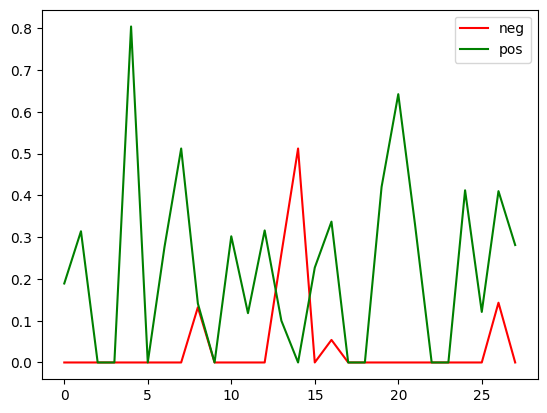

In [15]:
#Plotting negative and positive polarity scores against sentence index
plt.plot(df.index,df["neg"],"-r",label = "neg")
plt.plot(df.index,df["pos"],"-g",label = "pos")
plt.legend(loc="upper right")
plt.show()

### Clearly mostly the entire review was positive except for the one instance which we see by the peak at index 14

In [16]:
#Putting Polarity scores with their corresponding sentences in a dataframe
df["Sentence"] = all_text
df = df[["Sentence","neg","neu","pos","compound"]]
df.head()

,Sentence,neg,neu,pos,compound
0,hello folks this is it energy from a spider.co...,0.0,0.811,0.189,0.2732
1,on the right hand side is a power button which...,0.0,0.686,0.314,0.4939
2,along with the volume,0.0,1.000,0.000,0.0000
3,fingerprint scanner for this one is really fas...,0.0,1.000,0.000,0.0000
4,I found that to be great as,0.0,0.196,0.804,0.6249


In [17]:
#Fucntion to deduce the sentiment of a particular sentence
def deduce_sentiment(row):
    if row["neg"]>row["pos"] and row["compound"]<0:
        val = "Negative"
    elif row["neg"]<row["pos"] and row["compound"]>0:
        val = "Positive"
    else:
        val = "Neutral"
    return val

In [18]:
#Applying the above funciton on the data frame
df["Sentiment"] = df.apply(deduce_sentiment, axis=1)
df

,Sentence,neg,neu,pos,compound,Sentiment
0,hello folks this is it energy from a spider.co...,0.000,0.811,0.189,0.2732,Positive
1,on the right hand side is a power button which...,0.000,0.686,0.314,0.4939,Positive
2,along with the volume,0.000,1.000,0.000,0.0000,Neutral
3,fingerprint scanner for this one is really fas...,0.000,1.000,0.000,0.0000,Neutral
4,I found that to be great as,0.000,0.196,0.804,0.6249,Positive
5,at the back is a quad camera mo,0.000,1.000,0.000,0.0000,Neutral
6,on the left hand side is the simplest slot whi...,0.000,0.724,0.276,0.9862,Positive
7,I found this is one of the best cameras in thi...,0.000,0.488,0.512,0.6369,Positive
8,and you can take a look at all of the samples ...,0.132,0.728,0.141,0.0498,Positive
9,overall image quality was really pleas,0.000,1.000,0.000,0.0000,Neutral


### Finally we have the Sentiments mapped to the corresponding sentences of the review, with only 2 sentences with Negative Sentiments since most reviews were positive reviews.